# 2024C1-01 SMI WAXS TReXS core films plotting notebook

In [ ]:
# !pip install -e /nsls2/users/alevin/repos/PyHyperScattering  # to use pip to install via directory

## Imports

In [99]:
# import PyHyperScattering as phs
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from tqdm.auto import tqdm 
import subprocess
import io
# print(phs.__version__)

In [100]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

## Define paths

In [101]:
# Define paths
propPath = pathlib.Path('/nsls2/data/smi/proposals/2024-1/pass-313064')
procPath = propPath.joinpath('processed_data/andrew/')
outPath = procPath.joinpath('trgiwaxs_plots')
sampleZarrsPath = procPath.joinpath('trgiwaxs_zarrs')

In [102]:
# Define a sample id to sample name dictionary
sample_ids = ['Si-1', 'Si-2', 'Si-3', 'Si-4', 'Si-5', 'Si-6', 'Si-7', 'Si-8', 'Si-9', 'Si-10', 
              'Si-11', 'Si-12', 'Si-13', 'Si-14', 'Si-15', 'Si-16']
sample_names = ['PM6_10CN-CB_Si', 'PM6_10CN-CF_Si', 'PM6_CB_Si', 'PM6_CF_Si', 'PM6_p5CN-CB_Si', 'PM6_p5CN-CF_Si', 
                'PM6_p5CN-2CF-3CB_Si', 'PM6-Y6BO_CB_Si', 'PM6-Y6BO_p5CN-CB_Si', 'PM6-Y6_CB_Si', 'PM6-Y6_p5CN-CB_Si', 
                'Y6BO_CF_Si', 'Y6BO_p5CN-CF_Si', 'Y6_CF_Si', 'Y6_p5CN-CF_Si', 'PM6_5CN-CB_Si']

sn = {}
for k, v in zip(sample_ids, sample_names):
    sn[k] = v

sn

{'Si-1': 'PM6_10CN-CB_Si',
 'Si-2': 'PM6_10CN-CF_Si',
 'Si-3': 'PM6_CB_Si',
 'Si-4': 'PM6_CF_Si',
 'Si-5': 'PM6_p5CN-CB_Si',
 'Si-6': 'PM6_p5CN-CF_Si',
 'Si-7': 'PM6_p5CN-2CF-3CB_Si',
 'Si-8': 'PM6-Y6BO_CB_Si',
 'Si-9': 'PM6-Y6BO_p5CN-CB_Si',
 'Si-10': 'PM6-Y6_CB_Si',
 'Si-11': 'PM6-Y6_p5CN-CB_Si',
 'Si-12': 'Y6BO_CF_Si',
 'Si-13': 'Y6BO_p5CN-CF_Si',
 'Si-14': 'Y6_CF_Si',
 'Si-15': 'Y6_p5CN-CF_Si',
 'Si-16': 'PM6_5CN-CB_Si'}

### Rclone copy statement

### Load whole dataset from zarr(s)

In [103]:
sorted([f.name for f in sampleZarrsPath.glob('*')])

['.ipynb_checkpoints',
 'caked_Si-1.zarr',
 'caked_Si-10.zarr',
 'caked_Si-11.zarr',
 'caked_Si-12.zarr',
 'caked_Si-13.zarr',
 'caked_Si-14.zarr',
 'caked_Si-15.zarr',
 'caked_Si-16.zarr',
 'caked_Si-2.zarr',
 'caked_Si-3.zarr',
 'caked_Si-4.zarr',
 'caked_Si-5.zarr',
 'caked_Si-6.zarr',
 'caked_Si-7.zarr',
 'caked_Si-8.zarr',
 'caked_Si-9.zarr',
 'recip_Si-1.zarr',
 'recip_Si-10.zarr',
 'recip_Si-11.zarr',
 'recip_Si-12.zarr',
 'recip_Si-13.zarr',
 'recip_Si-14.zarr',
 'recip_Si-15.zarr',
 'recip_Si-16.zarr',
 'recip_Si-2.zarr',
 'recip_Si-3.zarr',
 'recip_Si-4.zarr',
 'recip_Si-5.zarr',
 'recip_Si-6.zarr',
 'recip_Si-7.zarr',
 'recip_Si-8.zarr',
 'recip_Si-9.zarr',
 'selected_energies_Y6BO_p5CN-CF_Si.zarr']

In [104]:
recip_DS_rows = []

recip_zarr_paths = sorted(sampleZarrsPath.glob('recip*'))
for zarr_path in tqdm(recip_zarr_paths):
    recip_DS = xr.open_zarr(zarr_path)
    recip_DS_rows.append(recip_DS)
    
recip_DS = xr.concat(recip_DS_rows, 'sample_id')
recip_DS = recip_DS.chunk({'sample_id':1, 'pix_y': 1576, 'pix_x': 1671, 'energy':1})
recip_DS = recip_DS.assign_coords({'sample_name': ('sample_id', [sn[sample_id] for sample_id in recip_DS.sample_id.values])})
recip_DS = recip_DS.swap_dims({'sample_id':'sample_name'})

recip_DS

  0%|          | 0/16 [00:00<?, ?it/s]

<xarray.Dataset>
Dimensions:        (energy: 39, pix_x: 1671, pix_y: 1576, sample_name: 16)
Coordinates:
  * energy         (energy) float64 2.445e+03 2.45e+03 ... 2.53e+03 2.55e+03
  * pix_x          (pix_x) int64 0 1 2 3 4 5 6 ... 1665 1666 1667 1668 1669 1670
  * pix_y          (pix_y) int64 0 1 2 3 4 5 6 ... 1570 1571 1572 1573 1574 1575
    q_x            (energy, pix_x) float64 dask.array<chunksize=(1, 1671), meta=np.ndarray>
    q_y            (energy, pix_y) float64 dask.array<chunksize=(1, 1576), meta=np.ndarray>
    sample_id      (sample_name) object 'Si-1' 'Si-10' 'Si-11' ... 'Si-8' 'Si-9'
  * sample_name    (sample_name) <U19 'PM6_10CN-CB_Si' ... 'PM6-Y6BO_p5CN-CB_Si'
Data variables:
    raw_intensity  (energy, sample_name, pix_y, pix_x) float64 dask.array<chunksize=(1, 1, 1576, 1671), meta=np.ndarray>

In [105]:
sorted([f.name for f in sampleZarrsPath.glob('recip*Si-13.zarr')])

['recip_Si-13.zarr']

In [119]:
recip_DS = xr.open_zarr(sorted(sampleZarrsPath.glob('recip*Si-13.zarr'))[0])
recip_DS = recip_DS.chunk({'sample_id':1, 'pix_y': 1576, 'pix_x': 1671, 'energy':1})
recip_DS = recip_DS.assign_coords({'sample_name': ('sample_id', [sn[sample_id] for sample_id in recip_DS.sample_id.values])})
recip_DS = recip_DS.swap_dims({'sample_id':'sample_name'})
# recip_DS = recip_DS.compute()
recip_DS

<xarray.Dataset>
Dimensions:        (energy: 39, pix_x: 1671, pix_y: 1576, sample_name: 1)
Coordinates:
  * energy         (energy) float64 2.445e+03 2.45e+03 ... 2.53e+03 2.55e+03
  * pix_x          (pix_x) int64 0 1 2 3 4 5 6 ... 1665 1666 1667 1668 1669 1670
  * pix_y          (pix_y) int64 0 1 2 3 4 5 6 ... 1570 1571 1572 1573 1574 1575
    q_x            (energy, pix_x) float64 dask.array<chunksize=(1, 1671), meta=np.ndarray>
    q_y            (energy, pix_y) float64 dask.array<chunksize=(1, 1576), meta=np.ndarray>
    sample_id      (sample_name) object 'Si-13'
  * sample_name    (sample_name) <U15 'Y6BO_p5CN-CF_Si'
Data variables:
    raw_intensity  (energy, sample_name, pix_y, pix_x) float64 dask.array<chunksize=(1, 1, 1576, 1671), meta=np.ndarray>

In [120]:
energies = [2445, 2476, 2476.5, 2477, 2477.5, 2478, 2550]
pix_x_slice = slice(150, 1700)  # ~ -0.22 to 0.65 Q
pix_y_slice = slice(200,1320)  # ~ -0.05 to 0.65 Q

recip_DS = recip_DS.sel(energy=energies, method='nearest').sel(pix_y=pix_y_slice, pix_x=pix_x_slice)
recip_DS = recip_DS.compute()
recip_DS

<xarray.Dataset>
Dimensions:        (energy: 7, pix_x: 1521, pix_y: 1121, sample_name: 1)
Coordinates:
  * energy         (energy) float64 2.445e+03 2.476e+03 ... 2.478e+03 2.55e+03
  * pix_x          (pix_x) int64 150 151 152 153 154 ... 1667 1668 1669 1670
  * pix_y          (pix_y) int64 200 201 202 203 204 ... 1317 1318 1319 1320
    q_x            (energy, pix_x) float64 -0.2335 -0.2329 ... 0.6864 0.687
    q_y            (energy, pix_y) float64 0.6461 0.6455 ... -0.01118 -0.01179
    sample_id      (sample_name) object 'Si-13'
  * sample_name    (sample_name) <U15 'Y6BO_p5CN-CF_Si'
Data variables:
    raw_intensity  (energy, sample_name, pix_y, pix_x) float64 26.62 ... 0.0

In [121]:
display(recip_DS['raw_intensity'].squeeze().data.shape)
display(recip_DS['raw_intensity'].squeeze().q_x.data.shape)
display(recip_DS['raw_intensity'].squeeze().q_y.data.shape)
display(recip_DS['raw_intensity'].squeeze().energy.data.shape)

(7, 1121, 1521)

(7, 1521)

(7, 1121)

(7,)

In [123]:
savePath = procPath.joinpath('recip_Y6BO_p5CNCF_Si_npys_v1')
savePath.mkdir(exist_ok=True)

In [124]:
np.save(savePath.joinpath('data_Y6BO_p5CNCF_Si.npy'), recip_DS['raw_intensity'].squeeze().data)
np.save(savePath.joinpath('qx_Y6BO_p5CNCF_Si.npy'), recip_DS['raw_intensity'].squeeze().q_x.data)
np.save(savePath.joinpath('qy_Y6BO_p5CNCF_Si.npy'), recip_DS['raw_intensity'].squeeze().q_y.data)
np.save(savePath.joinpath('energy_Y6BO_p5CNCF_Si.npy'), recip_DS['raw_intensity'].squeeze().energy.data)

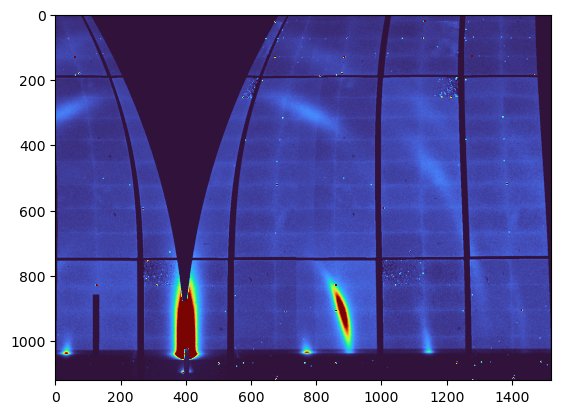

In [94]:
plt.imshow(np.load(sampleZarrsPath.joinpath('data_Y6BO_p5CNCF_Si.npy'))[0,:,:], cmap=cmap, norm=plt.Normalize(cmin,cmax))
plt.show()

In [65]:
recip_DS.to_netcdf(sampleZarrsPath.joinpath('selected_energies_Y6BO_p5CN-CF_Si.nc'))

In [66]:
recip_nc_DS = xr.open_dataset(sampleZarrsPath.joinpath('selected_energies_Y6BO_p5CN-CF_Si.nc'))

In [67]:
recip_nc_DS

<xarray.Dataset>
Dimensions:        (pix_x: 1521, pix_y: 1121, energy: 7, sample_name: 1)
Coordinates:
  * pix_x          (pix_x) int32 150 151 152 153 154 ... 1667 1668 1669 1670
  * pix_y          (pix_y) int32 200 201 202 203 204 ... 1317 1318 1319 1320
    q_x            (energy, pix_x) float64 ...
    q_y            (energy, pix_y) float64 ...
  * energy         (energy) float64 2.445e+03 2.476e+03 ... 2.478e+03 2.55e+03
  * sample_name    (sample_name) object 'Y6BO_p5CN-CF_Si'
    sample_id      (sample_name) object ...
Data variables:
    raw_intensity  (energy, sample_name, pix_y, pix_x) float64 ...

In [ ]:
# recip_DS_rows = []
# caked_DS_rows = []
# for sample_info in tqdm(unique_sample_infos[11:12]):
#     sample_zarrs = sorted(sampleZarrsPath.glob(f'*{sample_info}*'))
#     display(sorted([f.name for f in sample_zarrs]))
        
#     samp_recip_DS_rows = []
#     samp_caked_DS_rows = []
#     for sample_zarr in sample_zarrs:
#         if 'recip_' in sample_zarr.name:
#             recip_DS = xr.open_zarr(sample_zarr)
#         elif 'caked_' in sample_zarr.name:
#             caked_DS = xr.open_zarr(sample_zarr)   
            
#     recip_DS_rows.append(recip_DS)
#     caked_DS_rows.append(caked_DS)
    
# recip_DS = xr.concat(recip_DS_rows, 'sample_info')
# caked_DS = xr.concat(caked_DS_rows, 'sample_info')

In [ ]:
# recip_DS = recip_DS.chunk({'sample_info':1, 'pix_y': 1576, 'pix_x': 1671, 'energy':1})
# # caked_DS = caked_DS.chunk({'sample_info':1, 'index_y':1576,'index_x':1671,'energy':1})

In [ ]:
# caked_DS

In [ ]:
# caked_DS = caked_DS.swap_dims({'index_y':'chi'})

# q_r_coords = caked_DS.q_r.mean('energy')
# caked_DS = caked_DS.assign_coords({'q_red':('index_x', q_r_coords.data)}).swap_dims({'index_x':'q_red'})
# caked_DS

In [ ]:
# recip_DS.to_zarr(outPath.joinpath('zarrs/waxs_core_films_zarrs_WIP', f'recip_waxs_core_films.zarr'), mode='w')

In [ ]:
# energy = 2470

# for sample_info in unique_sample_infos:
#     for theta in [90, 55, 35]:
#         sliced_DA = recip_DS.sel(sample_info=sample_info, theta=theta).sel(energy=2470, method='nearest')['raw_intensity']

#         cmin = sliced_DA.compute().quantile(0.15)
#         cmax = sliced_DA.compute().quantile(0.995)
#         ax = sliced_DA.plot.imshow(norm=plt.Normalize(cmin, cmax), cmap=plt.cm.turbo, x='q_x', y='q_y')
#         ax.axes.set(title=f'{sample_info}: Energy = {energy}, Theta = {theta}')
#         plt.show()
#         plt.close('all')

## Detector movies

In [12]:
cmap = plt.cm.turbo.copy()
cmap.set_bad(cmap.get_under())

### recip

In [ ]:
%matplotlib inline

In [13]:
plt.close('all')

In [15]:
energies = [2445, 2476, 2476.5, 2477, 2577.5, 2478, 2550]

In [59]:
# Select Dataset
# DS = recip_DS
DS = recip_nc_DS


# Select Plotting Parameters
energy = 2445
energies = [2445, 2476, 2476.5, 2477, 2577.5, 2478, 2550]

# pix_size = 500
# pix_x_slice = slice(bcx-(pix_size/2), bcx+(pix_size/2))
# pix_y_slice = slice(bcy-(pix_size/2), bcy+(pix_size/2))

pix_x_slice = slice(150, 1700)  # ~ -0.22 to 0.65 Q
pix_y_slice = slice(200,1320)  # ~ -0.05 to 0.65 Q


# Select DataArray
# sample_info = 'PM6-Y6_3000_dSiN'
# for sample_info in tqdm(unique_sample_infos):
for energy in energies:
    for sample_name in tqdm(DS.sample_name.values):
        DA = DS.sel(sample_name=sample_name)['raw_intensity']
        
        # Plot
        sliced_DA = DA.sel(energy=energy,method='nearest')
        sliced_DA = sliced_DA.sel(pix_y=pix_y_slice, pix_x=pix_x_slice)
        cmin = float(sliced_DA.compute().quantile(0.01))
        cmax = float(sliced_DA.compute().quantile(0.993))

        ax = sliced_DA.plot.imshow(figsize=(5.5,4.5), x='q_x', y='q_y', cmap=cmap, norm=plt.Normalize(cmin,cmax))
        ax.figure.suptitle(f'Photon Energy = {np.round(energy, 1)} eV', fontsize=14, y=0.97)
        ax.figure.set_tight_layout(True)
        ax.axes.set(aspect='equal', title=f'{sample_name}', xlabel='q$_x$ [$Å^{-1}$]', ylabel='q$_y$ [$Å^{-1}$]')
        ax.colorbar.set_label('Intensity [arb. units]', rotation=270, labelpad=12)
        # ax.figure.savefig(outPath.joinpath('waxs_detector_movies_v1', f'{sample_info}_{theta}degth.png'), dpi=120)
        plt.show()
        plt.close('all')

  0%|          | 0/1 [00:00<?, ?it/s]

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
# Select Dataset
DS = recip_DS

# Select DataArray
# for sample_info in tqdm(unique_sample_infos[11:12]):
for sample_name in tqdm(DS.sample_name.values):
    DA = DS.sel(sample_name=sample_name)['raw_intensity']
    # DA = DS.squeeze()['raw_intensity']
    cmin = float(DA.compute().quantile(0.001))
    cmax = float(DA.compute().quantile(0.99))

    output_path = outPath.joinpath('waxs_detector_movies_pos1_v1', f'{sample_name}.mp4')

    # FFmpeg command. This is set up to accept data from the pipe and use it as input, with PNG format.
    # It will then output an H.264 encoded MP4 video.
    cmd = [
        'ffmpeg',
        '-y',  # Overwrite output file if it exists
        '-f', 'image2pipe',
        '-vcodec', 'png',
        '-r', '15',  # Frame rate
        '-i', '-',  # The input comes from a pipe
        '-vcodec', 'libx264',
        '-pix_fmt', 'yuv420p',
        '-crf', '17',  # Set the quality (lower is better, 17 is often considered visually lossless)
        str(output_path)
    ]

    # Start the subprocess
    proc = subprocess.Popen(cmd, stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    # Loop through the energy dimension and send frames to FFmpeg
    for energy in tqdm(DA.energy.values, desc=f'Making the {sample_name} movie'):
        # Make & customize plot
        sliced_DA = DA.sel(energy=energy, method='nearest')

        ax = sliced_DA.plot.imshow(figsize=(5.5,4.5), x='q_x', y='q_y', cmap=cmap, norm=plt.Normalize(cmin,cmax))
        ax.figure.suptitle(f'Photon Energy = {np.round(energy, 1)} eV', fontsize=14, y=0.97)
        ax.figure.set_tight_layout(True)   
        ax.axes.set(aspect='equal', title=f'{sample_name}', xlabel='q$_x$ [$Å^{-1}$]', ylabel='q$_y$ [$Å^{-1}$]')
        ax.colorbar.set_label('Intensity [arb. units]', rotation=270, labelpad=12)

        # Save figure to a PNG buffer
        # ax.figure.savefig(plotsPath.joinpath('detector_movies/frames', f'energy-{round(energy)}_frame-{i:03d}.png'), dpi=120)

        buf = io.BytesIO()
        ax.figure.savefig(buf, format='png')
        buf.seek(0)

        # Write the PNG buffer data to the process
        proc.stdin.write(buf.getvalue())
        plt.close('all')

    # Finish the subprocess
    out, err = proc.communicate()
    if proc.returncode != 0:
        print(f"Error: {err}")


### caked

In [ ]:
# # Select Dataset
# DS = caked_DS.copy()


# # Select Plotting Parameters
# energy = 2470
# chi_slice = slice(-125,25)
# # chi_slice = slice(-150,50)
# # chi_slice = slice(None,None)

# qr_slice = slice(None,0.7)
# # qr_slice = slice(None,None)

# # Select DataArray
# # sample_info = 'PM6-Y6_3000_dSiN'
# for sample_info in tqdm(unique_sample_infos):
#     for theta in [90]:
#         DA = DS.sel(sample_info=sample_info, theta=theta)['raw_intensity']


#         # Plot
#         sliced_DA = DA.sel(energy=energy,method='nearest').sel(chi=chi_slice, q_red=qr_slice)
#         cmin = float(sliced_DA.compute().quantile(0.1))
#         cmax = float(sliced_DA.compute().quantile(0.98))

#         ax = sliced_DA.plot.imshow(figsize=(5.5,4.5), x='q_r', y='chi', cmap=cmap, norm=plt.Normalize(cmin,cmax))
#         ax.figure.suptitle(f'Photon Energy = {np.round(energy, 1)} eV', fontsize=14, y=0.96)
#         ax.figure.set_tight_layout(True)
#         ax.axes.set(title=f'{sample_info}, $\\theta$ = {theta}°', xlabel='q$_r$ [$Å^{-1}$]', ylabel='$\\chi$ [°]')
#         ax.colorbar.set_label('Intensity [arb. units]', rotation=270, labelpad=12)
#         # ax.figure.savefig(outPath.joinpath('waxs_detector_movies_v1', f'{sample_info}_{theta}degth.png'), dpi=120)
#         plt.show()
#         plt.close('all')

In [ ]:
# # Select Dataset
# DS = caked_DS.copy()

# # plotting parameters
# chi_slice = slice(-150,50)
# # chi_slice = slice(None,None)

# qr_slice = slice(None,0.7)
# # qr_slice = slice(None,None)

# # Select DataArray
# for sample_info in tqdm(unique_sample_infos):
# # for sample_info in tqdm(['PM6_1CN-CB']):
#     for theta in [90, 55, 35]:
#         DA = DS.sel(sample_info=sample_info, theta=theta)['raw_intensity']
#         cmin = float(DA.compute().quantile(0.15))
#         cmax = float(DA.compute().quantile(0.995))

#         output_path = outPath.joinpath('trexs_plots/caked_waxs_detector_movies_v1', f'{sample_info}_{theta}degth.mp4')

#         # FFmpeg command. This is set up to accept data from the pipe and use it as input, with PNG format.
#         # It will then output an H.264 encoded MP4 video.
#         cmd = [
#             'ffmpeg',
#             '-y',  # Overwrite output file if it exists
#             '-f', 'image2pipe',
#             '-vcodec', 'png',
#             '-r', '15',  # Frame rate
#             '-i', '-',  # The input comes from a pipe
#             '-vcodec', 'libx264',
#             '-pix_fmt', 'yuv420p',
#             '-crf', '17',  # Set the quality (lower is better, 17 is often considered visually lossless)
#             str(output_path)
#         ]

#         # Start the subprocess
#         proc = subprocess.Popen(cmd, stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

#         # Loop through the energy dimension and send frames to FFmpeg
#         for i, energy in enumerate(tqdm(DA.energy.values, desc=f'Making the {sample_info} {theta}° movie')):
#             # Make & customize plot
#             sliced_DA = DA.sel(energy=energy,method='nearest').swap_dims(
#                 {'index_y':'chi','index_x':'q_r'}).sel(chi=chi_slice, q_r=qr_slice)
            
#             ax = sliced_DA.plot.imshow(figsize=(5.5,4.5), cmap=cmap, norm=plt.Normalize(cmin,cmax))
#             ax.figure.suptitle(f'Photon Energy = {np.round(energy, 1)} eV', fontsize=14, y=0.96)
#             ax.figure.set_tight_layout(True)   
#             ax.axes.set(title=f'{sample_info}, $\\theta$ = {theta}°', xlabel='q$_r$ [$Å^{-1}$]', ylabel='$\\chi$ [°]')
#             ax.colorbar.set_label('Intensity [arb. units]', rotation=270, labelpad=12)

#             # Save figure if first frame:
#             if i==0:
#                 ax.figure.savefig(outPath.joinpath('trexs_plots/caked_waxs_detector_movies_v1', f'{sample_info}_{theta}degth.png'), dpi=120)

#             buf = io.BytesIO()
#             ax.figure.savefig(buf, format='png')
#             buf.seek(0)

#             # Write the PNG buffer data to the process
#             proc.stdin.write(buf.getvalue())
#             plt.close('all')

#         # Finish the subprocess
#         out, err = proc.communicate()
#         if proc.returncode != 0:
#             print(f"Error: {err}")


## Integrate selected areas vs energy

In [ ]:
DS = caked_DS.copy()

In [ ]:
%matplotlib widget

In [ ]:
plt.close('all')

In [ ]:
energy=2477
# energy=2150.8

# DA = DS.sel(sample_info=sample_info)['raw_intensity']
DA = DS.squeeze()['raw_intensity']
sliced_DA = DA.sel(energy=energy, method='nearest')  
cmin=sliced_DA.compute().quantile(0.01)
cmax=sliced_DA.compute().quantile(0.99)

sliced_DA.plot.imshow(cmap=cmap, norm=plt.Normalize(cmin,cmax))
plt.show()
# plt.close('all')

In [ ]:
plt.close('all')

In [ ]:
# DA = DS.sel(sample_info=sample_info)['raw_intensity']
DA = DS.squeeze()['raw_intensity']

sliced_DA = DA.sel(energy=2477, method='nearest').sel(chi=slice(-15,15))
sliced_DA = sliced_DA.where(sliced_DA>1e-3).mean('chi')
sliced_DA.sel(q_red=slice(0.275, 0.36)).plot()
plt.show()
# plt.close('all')

In [ ]:
%matplotlib inline

In [ ]:
plt.close('all')

In [ ]:
# make selection, subtracted flat line to compare peak intensities overlayed
DS = caked_DS.copy()

# make selection
q_slice = slice(0.28, 0.36)   # peak slice here
chi_slice = slice(-15,15)
e_slice = slice(None, None)

# for sample_info in tqdm(unique_sample_infos[:]):
for sample_info in tqdm(DS.sample_info.values):
    DA = DS.sel(sample_info=sample_info)['raw_intensity']
    
    # Mean over chi
    sliced_DA = DA.sel(chi=chi_slice, q_red=q_slice)
    sliced_DA = sliced_DA.where(sliced_DA>1e-3).mean('chi')

    # Integrate/sum q:
    peak_areas_DA = sliced_DA.sum('q_red')

    # Plot        
    fig, ax = plt.subplots(figsize=(5,4), tight_layout=True)
    peak_areas_DA.sel(energy=e_slice).plot.line(ax=ax)

    fig.suptitle(f'Lamella peak area vs photon energy: {sample_info}', x=0.53, y=0.95)

    ax.set(ylabel=f'Integrated q ({q_slice.start}, {q_slice.stop}) [arb. units]', xlabel='Energy [eV]')

    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.xaxis.grid(True, which='major')
    # ax.legend()


    # savePath = outPath.joinpath('lamella_peakarea-vs-energy_v1')
    # savePath.mkdir(exist_ok=True)
    # fig.savefig(savePath.joinpath(
    #     f'{sample_info}_chiWidth-{chi_width}deg_q-{q_slice.start}-{q_slice.stop}_energy{e_slice.start}-{e_slice.stop}.png'), dpi=120)

    plt.show()
    # plt.close('all')

In [ ]:
plt.close('all')

In [ ]:
# make selection, subtracted flat line to compare peak intensities overlayed
DS = caked_DS.copy()

# make selection
q_slice = slice(0.49, 0.56)   

# chi_slice = slice(-62, -50)  # good if stitched with wa20
# chi_slice = slice(-28, -18)  # good if only wa0

e_slice = slice(None, None)

# for sample_info in tqdm(unique_sample_infos):
for sample_info in tqdm(DS.sample_info.values):
    DA = DS.sel(sample_info=sample_info)['raw_intensity']
    
    # Mean over chi
    sliced_DA = DA.sel(chi=chi_slice, q_red=q_slice)
    sliced_DA = sliced_DA.where(sliced_DA>1e-3).mean('chi')

    # Integrate/sum q:
    peak_areas_DA = sliced_DA.sum('q_red')

    # Plot        
    fig, ax = plt.subplots(figsize=(5,4), tight_layout=True)
    peak_areas_DA.sel(energy=e_slice).plot.line(ax=ax)

    fig.suptitle(f'"NEXAFS": {sample_info}', x=0.53, y=0.95)

    ax.set(ylabel=f'Integrated q ({q_slice.start}, {q_slice.stop}) [arb. units]', xlabel='Energy [eV]')

    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.xaxis.grid(True, which='major')
    # ax.legend()


    # savePath = outPath.joinpath('lamella_peakarea-vs-energy_v1')
    # savePath.mkdir(exist_ok=True)
    # fig.savefig(savePath.joinpath(
    #     f'{sample_info}_theta-{theta}deg_chiWidth-{chi_width}deg_q-{q_slice.start}-{q_slice.stop}_energy{e_slice.start}-{e_slice.stop}.png'), dpi=120)

    plt.show()
    # plt.close('all')

In [ ]:
plt.close('all')

In [ ]:
# make selection multiple selections
DS = caked_DS.copy()

# make selection
q_slice_1 = slice(0.49, 0.56)  # NEXAFS
q_slice_2 = slice(0.28, 0.36)  # lamella peak region

chi_slice_1 = slice(-28, -18)  # NEXAFS, good if stitched with wa20
chi_slice_2 = slice(-15, 15)  # lamella peak region

e_slice = slice(None, None)

# for sample_info in tqdm(unique_sample_infos):
for sample_info in tqdm(DS.sample_info.values):
    DA = DS.sel(sample_info=sample_info)['raw_intensity']
    
    # 1
    # Mean over chi
    sliced_DA_1 = DA.sel(chi=chi_slice_1, q_red=q_slice_1)
    sliced_DA_1 = sliced_DA_1.where(sliced_DA_1>1e-3).mean('chi')

    # Integrate/sum q:
    peak_areas_DA_1 = sliced_DA_1.sum('q_red')
    
    # 2
    # Mean over chi
    sliced_DA_2 = DA.sel(chi=chi_slice_2, q_red=q_slice_2)
    sliced_DA_2 = sliced_DA_2.where(sliced_DA_2>1e-3).mean('chi')

    # Integrate/sum q:
    peak_areas_DA_2 = sliced_DA_2.sum('q_red')

    # Plot        
    fig, ax = plt.subplots(figsize=(5,4), tight_layout=True)
    ax2 = ax.twinx()
    peak_areas_DA_1.sel(energy=e_slice).plot.line(ax=ax, label='NEXAFS')
    peak_areas_DA_2.sel(energy=e_slice).plot.line(ax=ax2, label='Peak area', color='C1')

    fig.suptitle(f'"NEXAFS": {sample_info}', x=0.53, y=0.95)

    ax.set(ylabel=f'Integrated q ({q_slice_1.start}, {q_slice_1.stop}) [arb. units]', xlabel='Energy [eV]')

    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.xaxis.grid(True, which='major')
    ax.legend()
    ax2.legend(loc='upper left')


    # savePath = outPath.joinpath('lamella_peakarea-vs-energy_v1')
    # savePath.mkdir(exist_ok=True)
    # fig.savefig(savePath.joinpath(
    #     f'{sample_info}_theta-{theta}deg_chiWidth-{chi_width}deg_q-{q_slice.start}-{q_slice.stop}_energy{e_slice.start}-{e_slice.stop}.png'), dpi=120)

    plt.show()
    # plt.close('all')

## Qr linecut

In [ ]:
caked_DS.energy

In [ ]:
# selected_energies = [2120, 2125.6, 2139.6, 2150.8, 2162, 2170.4, 2178.8, 2187.2]
selected_energies = [2445, 2470, 2475, 2476, 2476.5, 2477, 2478, 2483, 2540]

In [ ]:
len(selected_energies)

In [ ]:
plt.close('all')

In [ ]:
# make selection multiple selections
DS = caked_DS.copy()

# make selection
q_slice = slice(0.21, 0.8)  # 
# chi_slice = slice(-15, 15)  # lamella peak region
chi_slice = slice(-82, -65)  # in-plane


# e_slice = slice(None, None)

# for sample_info in tqdm(unique_sample_infos):
for sample_info in tqdm(DS.sample_info.values):
    DA = DS.sel(sample_info=sample_info)['raw_intensity']
    # energy = int(DA.energy.values)
    # cmin = float(DA.compute().quantile(0.0001))  # good for 1180
    # cmax = float(DA.compute().quantile(0.995))  # good for 1180

    # Plot
    # colors = plt.cm.Dark2(np.linspace(0, 1, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(selected_energies)))

    fig, ax = plt.subplots(figsize=(6,3.5), tight_layout=True, dpi=120)
    

    for j, energy in enumerate(selected_energies):
        p1, = (DA.sel(q_red=q_slice, chi=chi_slice).sel(energy=energy, method='nearest').mean('chi')
         .plot.line(ax=ax, color=colors[j], yscale='linear', xscale='linear', label=energy))

    # fig.suptitle(f'I vs Q linecuts: {sample_info}', y=0.93, x=0.43)

    ax.set_title(f'{sample_info}: Chi: ({chi_slice.start},{chi_slice.stop}), Q: ({q_slice.start},{q_slice.stop})')
    ax.set(ylabel='Full $\chi$ intensity [arb. units]', xlabel='Q [$Å^{-1}$]')
    ax.legend(title='energy')

    
    # lines= [p1,p2,p3]
    # ax1.legend(title='$\chi$ regions', handles=lines, labels=[l.get_label() for l in lines])

    # savePath = plotsPath.joinpath('rsoxs_1180/qr_linecuts_v1')
    # fig.savefig(savePath.joinpath(f'{sample_info}_{edge}.png'), dpi=120)

    plt.show()
    # plt.close('all')

## Chi linecut

In [ ]:
DA.sel(q_red=q_slice, energy=energy)

In [ ]:
# make selection, subtracted flat line to compare peak intensities overlayed
DS = caked_DS.copy()

# make selection
q_slice = slice(0.25, 0.33)   # peak slice here
chi_slice = slice(-125, 25)
bad_chi_slices = [slice(-110, -102), slice(-77, -68), slice(-59,-56), slice(-33,-29), slice(-25,-21), slice(-5,-2)]

# Select DataArray
for sample_info in tqdm(unique_sample_infos[-3:]):
    for theta in [90]:
        DA = DS.sel(sample_info=sample_info, theta=theta)['raw_intensity']
        DA = DA.where(DA>1).where(DA<(DA.max()*0.03))
        for slice_to_nan in bad_chi_slices:
            DA.loc[{'chi': slice_to_nan}] = np.nan
        DA = DA.interpolate_na(dim='chi')
        
        DA = DA.sel(chi=chi_slice).groupby_bins('chi', 20).mean('chi')
        
        
        # Plot
        energies = DA.energy.sel(energy=[2445, 2470.2, 2472, 2474, 2476, 2477, 2478, 2484, 2550], method='nearest').data

        cmap = plt.cm.viridis.copy()
        colors = cmap(np.linspace(0, 1, len(energies)))

        fig, ax = plt.subplots(figsize=(4,3), tight_layout=True)
        
        for i, energy in enumerate(energies):
            # sliced_DA = (DA.sel(q_red=q_slice, energy=energy) - 
            #              DA.sel(q_red=slice(0.2,0.23), energy=energy).mean('q_red'))
            # sliced_DA_snap = sliced_DA.copy()
            sliced_DA = DA.sel(q_red=q_slice, energy=energy)
            sliced_DA = sliced_DA.integrate('q_red')
            sliced_DA = sliced_DA / float(sliced_DA.sel(chi_bins=slice(-60,-40)).mean('chi_bins'))
            
            sliced_DA.plot.line(ax=ax, color=colors[i], label=energy)
            
        ax.set_title(f'{sample_info}, $\\theta$={theta}°')
        ax.set(ylabel='Chi-bin-meaned Q-integrated intensity [arb. units]')
        ax
        
        ax.xaxis.set_major_locator(MultipleLocator(90))
        ax.xaxis.set_minor_locator(MultipleLocator(45))
        ax.xaxis.grid(True, which='both')
        
        plt.show()
        plt.close('all')

In [ ]:
# make selection, subtracted flat line to compare peak intensities overlayed
DS = caked_DS.copy()

# make selection
q_slice = slice(0.23, 0.32)   # peak slice here
chi_width = 90
e_slice = slice(2470, 2485)

for sample_info in tqdm(unique_sample_infos[:]):
    for theta in [90, 55, 35]:
        para_DA, perp_DA = make_para_perp_DAs(DS, sample_info, theta, chi_width) 
        
        para_DA = para_DA.where(para_DA>0.4).where(para_DA<(para_DA.max()*0.03))
        perp_DA = perp_DA.where(perp_DA>0.4).where(perp_DA<(perp_DA.max()*0.03))

        # Subtract pre-peak flat line
        para_DA = para_DA - para_DA.sel(q_red=slice(0.2,0.23)).mean('q_red')
        perp_DA = perp_DA - perp_DA.sel(q_red=slice(0.2,0.23)).mean('q_red')
        
        # Mean/integrate chi/q:
        para_areas_DA = para_DA.sel(q_red=q_slice).mean('chi').integrate('q_red')
        perp_areas_DA = perp_DA.sel(q_red=q_slice).mean('chi').integrate('q_red')
        
        # Plot        
        fig, ax = plt.subplots(figsize=(5,4), tight_layout=True)
        para_areas_DA.sel(energy=e_slice).plot.line(ax=ax, label='Para')
        perp_areas_DA.sel(energy=e_slice).plot.line(ax=ax, label='Perp')

        fig.suptitle(f'Lamella peak area vs photon energy: {sample_info}', x=0.53, y=0.95)

        ax.set_title(f'$\\theta$ = {theta}°, $\chi$ width = 90°')
        ax.set(ylabel=f'Integrated q ({q_slice.start}, {q_slice.stop}) [arb. units]', xlabel='Energy [eV]')
        
        ax.xaxis.set_minor_locator(MultipleLocator(1))
        ax.xaxis.grid(True, which='both')
        ax.legend()
        

        savePath = outPath.joinpath('trexs_plots/waxs_core_films_trexs_plots/peakarea-vs-energy_v2')
        savePath.mkdir(exist_ok=True)
        fig.savefig(savePath.joinpath(
            f'{sample_info}_theta-{theta}deg_chiWidth-{chi_width}deg_q-{q_slice.start}-{q_slice.stop}_energy{e_slice.start}-{e_slice.stop}.png'), dpi=120)
        
        # plt.show()
        plt.close('all')

In [ ]:
# make selection
DS = caked_DS.copy()

# make selection
q_slice = slice(0.1, 0.5)
chi_width = 90
# energy_slice = slice(2470, 2485)

for sample_info in tqdm(unique_sample_infos[:]):
    for theta in [90]:
        para_DA, perp_DA = make_para_perp_DAs(DS, sample_info, theta, chi_width) 
        
        para_DA = para_DA.where(para_DA>0.4).where(para_DA<(para_DA.max()*0.03))  #.interpolate_na(dim='chi')
        # para_DA.sel(energy=2477.2,method='nearest').sel(q_red=slice(0.05, 0.7)).plot.imshow()
        # plt.title('para')
        # plt.show()
        
        perp_DA = perp_DA.where(perp_DA>0.4).where(perp_DA<(perp_DA.max()*0.03))  #.interpolate_na(dim='chi')
        # perp_DA.sel(energy=2477.2,method='nearest').sel(q_red=slice(0.05, 0.7)).plot.imshow()
        # plt.title('perp')
        # plt.show()
        # plt.close('all')

        
        # Plot
        energies = para_DA.energy.sel(energy=[2445, 2470.2, 2472, 2474, 2476, 2477, 2478, 2484, 2550], method='nearest').data

        cmap = plt.cm.turbo.copy()
        colors = cmap(np.linspace(0, 1, len(energies)))

        fig, axs = plt.subplots(ncols=2,figsize=(8,4), tight_layout=True)

        for j, energy in enumerate(energies):
            (para_DA.sel(q_red=q_slice, energy=energy).mean('chi')
             .plot.line(ax=axs[0], color=colors[j], yscale='linear', xscale='linear', label=energy))
            (perp_DA.sel(q_red=q_slice, energy=energy).mean('chi')
             .plot.line(ax=axs[1], color=colors[j], yscale='linear', xscale='linear', label=energy))

        fig.suptitle(f'IvsQ, $\\theta$ = {theta}°, $\chi$ width = 90°: {sample_info}', x=0.47)

        axs[0].set(title=f'Parallel to E$_p$', ylabel='Intensity [arb. units]', xlabel='Q [$Å^{-1}$]')
        axs[1].set(title=f'Perpendicular to E$_p$', ylabel='Intensity [arb. units]', xlabel='Q [$Å^{-1}$]')
        axs[1].legend(title='Energy [eV]', loc=(1.05,0.1))

        # fig.savefig(outPath.joinpath('trexs_plots/I_cuts_v1', 
        #     f'{sample_info}_theta-{theta}deg_chiWidth-{chi_width}deg_q-{q_slice.start}-{q_slice.stop}.png'), dpi=120)
        
        plt.show()
        plt.close('all')

## Anisotropy Ratio Plots

### 1. 2D AR Maps

In [ ]:
para_DA.interpolate_na(dim='chi')

In [ ]:
DS = caked_DS.copy()

# make selection
q_slice = slice(0.05, 0.8)
chi_width = 90
energy_slice = slice(2470, 2485)

# para_sin35, perp_sin35 = make_para_perp_DAs(DS, 'BareSiN_01', 35, chi_width) 
# para_sin55, perp_sin55 = make_para_perp_DAs(DS, 'BareSiN_01', 55, chi_width) 
# para_sin90, perp_sin90 = make_para_perp_DAs(DS, 'BareSiN_01', 90, chi_width) 

for sample_info in tqdm(unique_sample_infos):
    for theta in [90, 55, 35]:
        para_DA, perp_DA = make_para_perp_DAs(DS, sample_info, theta, chi_width) 
        
        para_DA = para_DA.where(para_DA>0.4).where(para_DA<(para_DA.max()*0.03))  #.interpolate_na(dim='chi')
        # para_DA.sel(energy=2477.2,method='nearest').sel(q_red=slice(0.05, 0.7)).plot.imshow()
        # plt.title('para')
        # plt.show()
        
        perp_DA = perp_DA.where(perp_DA>0.4).where(perp_DA<(perp_DA.max()*0.03))  #.interpolate_na(dim='chi')
        # perp_DA.sel(energy=2477.2,method='nearest').sel(q_red=slice(0.05, 0.7)).plot.imshow()
        # plt.title('perp')
        # plt.show()
        # plt.close('all')
            
        # Select AR data
        ar_DA = (para_DA.mean('chi') - perp_DA.mean('chi')) / (para_DA.mean('chi') + perp_DA.mean('chi'))

        # Plot
        vlim = 0.4
        ax = ar_DA.sel(energy=energy_slice, q_red=q_slice).plot.pcolormesh(
            cmap=plt.cm.RdBu_r, figsize=(8,5), norm=plt.Normalize(-vlim, vlim), xscale='linear')
        # ax = ar_DA.sel(energy=energy_slice, q_red=q_slice).plot.pcolormesh(figsize=(8,5))

        ax.figure.suptitle('Anisotropy Ratio (AR) Map', fontsize=14, x=0.43)
        ax.axes.set(title=f'{sample_info}, $\\theta$ = {theta}°, Chi Width = {chi_width}°', ylabel='Photon Energy [eV]', xlabel='q [$Å^{-1}$]')
        ax.colorbar.set_label('AR [arb. units]', rotation=270, labelpad=12)


        # ax.figure.savefig(outPath.joinpath('trexs_plots/ar_maps_v1', 
        #     f'{sample_info}_theta-{theta}deg_chiWidth-{chi_width}deg_q-{q_slice.start}-{q_slice.stop}_energy{energy_slice.start}-{energy_slice.stop}.png'), 
        #                   dpi=120)

        plt.show()
        plt.close('all')

In [ ]:
outPath.joinpath('trexs_plots/ar_maps_v1')

### 2. 1D meaned AR linecuts

In [ ]:
# make selection
# sample_info = 'Y6_CB_2500'
DS = caked_DS.copy()

# make selection
q_slice = slice(0.05, 0.8)
chi_width = 90
# energy_slice = slice(2470, 2485)

for sample_info in tqdm(unique_sample_infos):
    for theta in [90, 55, 35]:
        para_DA, perp_DA = make_para_perp_DAs(DS, sample_info, theta, chi_width) 
        
        para_DA = para_DA.where(para_DA>0.4).where(para_DA<(para_DA.max()*0.03))  #.interpolate_na(dim='chi')
        # para_DA.sel(energy=2477.2,method='nearest').sel(q_red=slice(0.05, 0.7)).plot.imshow()
        # plt.title('para')
        # plt.show()
        
        perp_DA = perp_DA.where(perp_DA>0.4).where(perp_DA<(perp_DA.max()*0.03))  #.interpolate_na(dim='chi')
        # perp_DA.sel(energy=2477.2,method='nearest').sel(q_red=slice(0.05, 0.7)).plot.imshow()
        # plt.title('perp')
        # plt.show()
        # plt.close('all')
            
        # Select AR data
        ar_DA = (para_DA.mean('chi') - perp_DA.mean('chi')) / (para_DA.mean('chi') + perp_DA.mean('chi'))

        # Plot   
        energies = para_DA.energy.sel(energy=[2445, 2470.2, 2472, 2474, 2476, 2477, 2478, 2484, 2550], method='nearest').data
        cmap = plt.cm.turbo.copy()
        colors = cmap(np.linspace(0, 1, len(energies)))        

        # # Create a ScalarMappable object with the colormap and normalization & add the colorbar to the figure
        # sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=energies[0], vmax=energies[-1]))
        # cax = ax.inset_axes([1.03, 0, 0.03, 1])
        # cbar = fig.colorbar(sm, cax=cax, orientation='vertical')
        # cbar.set_label(label=f'Time [seconds]', labelpad=14)
        # cbar.set_ticks(np.round(np.linspace(energies[0], energies[-1], len(energies)), 2))

        fig, ax = plt.subplots(tight_layout=True, figsize=(6,4), dpi=120)

        qmin = 8e-3 
        qmax = 8e-2

        for j, energy in enumerate(energies):
            (ar_DA.sel(energy=energy, q_red=q_slice).plot.line(ax=ax, color=colors[j], label=energy, xscale='linear'))

        fig.suptitle(f'Anisotropy Ratio Linecuts: {sample_info}', x=0.46)

        ax.set(title=f'Chi width = {chi_width}°, $\\theta$ = {theta}°', ylim=(-0.5, 0.5), ylabel='AR [arb. units]', xlabel='Q [$Å^{-1}$]')
        ax.legend(title='Energy [eV]', loc=(1.03,0.02))


        fig.savefig(outPath.joinpath('trexs_plots/ar_cuts_v1', 
            f'{sample_info}_theta-{theta}deg_chiWidth-{chi_width}deg_q-{q_slice.start}-{q_slice.stop}.png'), dpi=120)

        # plt.show()
        plt.close('all')

In [ ]:
ar_DA.hvplot.line(groupby="energy")

## Meaned 1D intensity lineplots, selected energies

In [ ]:
# manual_scale_factors_v1 = {
#     'PM6_CB_3000': 6.5,
#     ...
#     'Y6_CF_2500': 8.5,
# }

# len(manual_scale_factors_v1)

In [ ]:
para_DA.sel(q_red=slice(0.2,0.23)).mean('q_red')

In [ ]:
unique_sample_infos

In [ ]:
# make selection
DS = caked_DS.copy()

# make selection
q_slice = slice(0.1, 0.5)
chi_width = 90
# energy_slice = slice(2470, 2485)

for sample_info in tqdm(unique_sample_infos[-1:]):
    for theta in [90]:
        para_DA, perp_DA = make_para_perp_DAs(DS, sample_info, theta, chi_width) 
        
        para_DA = para_DA.where(para_DA>0.4).where(para_DA<(para_DA.max()*0.03))  #.interpolate_na(dim='chi')
        # para_DA.sel(energy=2477.2,method='nearest').sel(q_red=slice(0.05, 0.7)).plot.imshow()
        # plt.title('para')
        # plt.show()
        
        perp_DA = perp_DA.where(perp_DA>0.4).where(perp_DA<(perp_DA.max()*0.03))  #.interpolate_na(dim='chi')
        # perp_DA.sel(energy=2477.2,method='nearest').sel(q_red=slice(0.05, 0.7)).plot.imshow()
        # plt.title('perp')
        # plt.show()
        # plt.close('all')

        
        # Plot
        energies = para_DA.energy.sel(energy=[2445, 2470.2, 2472, 2474, 2476, 2477, 2478, 2484, 2550], method='nearest').data

        cmap = plt.cm.turbo.copy()
        colors = cmap(np.linspace(0, 1, len(energies)))

        fig, axs = plt.subplots(ncols=2,figsize=(8,4), tight_layout=True)

        for j, energy in enumerate(energies):
            (para_DA.sel(q_red=q_slice, energy=energy).mean('chi')
             .plot.line(ax=axs[0], color=colors[j], yscale='linear', xscale='linear', label=energy))
            (perp_DA.sel(q_red=q_slice, energy=energy).mean('chi')
             .plot.line(ax=axs[1], color=colors[j], yscale='linear', xscale='linear', label=energy))

        fig.suptitle(f'IvsQ, $\\theta$ = {theta}°, $\chi$ width = 90°: {sample_info}', x=0.47)

        axs[0].set(title=f'Parallel to E$_p$', ylabel='Intensity [arb. units]', xlabel='Q [$Å^{-1}$]')
        axs[1].set(title=f'Perpendicular to E$_p$', ylabel='Intensity [arb. units]', xlabel='Q [$Å^{-1}$]')
        axs[1].legend(title='Energy [eV]', loc=(1.05,0.1))

        # fig.savefig(outPath.joinpath('trexs_plots/I_cuts_v1', 
        #     f'{sample_info}_theta-{theta}deg_chiWidth-{chi_width}deg_q-{q_slice.start}-{q_slice.stop}.png'), dpi=120)
        
        plt.show()
        plt.close('all')

In [ ]:
# make selection, subtracted flat line to compare peak intensities overlayed
DS = caked_DS.copy()

# make selection
q_slice = slice(0.1, 0.5)
chi_width = 90
# energy_slice = slice(2470, 2485)

for sample_info in tqdm(unique_sample_infos[-1:]):
    for theta in [90, 55, 35]:
        para_DA, perp_DA = make_para_perp_DAs(DS, sample_info, theta, chi_width) 
        
        para_DA = para_DA.where(para_DA>0.4).where(para_DA<(para_DA.max()*0.03))  #.interpolate_na(dim='chi')
        # para_DA.sel(energy=2477.2,method='nearest').sel(q_red=slice(0.05, 0.7)).plot.imshow()
        # plt.title('para')
        # plt.show()
        
        perp_DA = perp_DA.where(perp_DA>0.4).where(perp_DA<(perp_DA.max()*0.03))  #.interpolate_na(dim='chi')
        # perp_DA.sel(energy=2477.2,method='nearest').sel(q_red=slice(0.05, 0.7)).plot.imshow()
        # plt.title('perp')
        # plt.show()
        # plt.close('all')

        # Subtract pre-peak flat line
        para_DA = para_DA - para_DA.sel(q_red=slice(0.2,0.23)).mean('q_red')
        perp_DA = perp_DA - perp_DA.sel(q_red=slice(0.2,0.23)).mean('q_red')

        
        # Plot
        energies = para_DA.energy.sel(energy=[2445, 2470.2, 2472, 2474, 2476, 2477, 2478, 2484, 2550], method='nearest').data

        # cmap = plt.cm.turbo.copy()
        cmap = plt.cm.viridis.copy()
        colors = cmap(np.linspace(0, 1, len(energies)))

        fig, axs = plt.subplots(ncols=2,figsize=(8,4), tight_layout=True)

        for j, energy in enumerate(energies):
            (para_DA.sel(q_red=q_slice, energy=energy).mean('chi')
             .plot.line(ax=axs[0], color=colors[j], yscale='linear', xscale='linear', label=energy))
            (perp_DA.sel(q_red=q_slice, energy=energy).mean('chi')
             .plot.line(ax=axs[1], color=colors[j], yscale='linear', xscale='linear', label=energy))

        fig.suptitle(f'IvsQ, $\\theta$ = {theta}°, $\chi$ width = 90°: {sample_info}', x=0.47)

        axs[0].set(title=f'Parallel to E$_p$', ylabel='Intensity [arb. units]', xlabel='Q [$Å^{-1}$]')
        axs[1].set(title=f'Perpendicular to E$_p$', ylabel='Intensity [arb. units]', xlabel='Q [$Å^{-1}$]')
        axs[1].legend(title='Energy [eV]', loc=(1.05,0.1))

        # savePath = outPath.joinpath('trexs_plots/waxs_core_films_trexs_plots/I_cuts_flatsub_v1')
        # savePath.mkdir(exist_ok=True)
        # fig.savefig(savePath.joinpath(
        #     f'{sample_info}_theta-{theta}deg_chiWidth-{chi_width}deg_q-{q_slice.start}-{q_slice.stop}.png'), dpi=120)
        
        plt.show()
        plt.close('all')

In [ ]:
# make selection, subtracted flat line & normalized to peak maximum
DS = caked_DS.copy()

# make selection
q_slice = slice(0.1, 0.5)
chi_width = 90
# energy_slice = slice(2470, 2485)

for sample_info in tqdm(unique_sample_infos[:]):
    for theta in [90, 55, 35]:
        para_DA, perp_DA = make_para_perp_DAs(DS, sample_info, theta, chi_width) 
        
        para_DA = para_DA.where(para_DA>0.4).where(para_DA<(para_DA.max()*0.03))  #.interpolate_na(dim='chi')
        # para_DA.sel(energy=2477.2,method='nearest').sel(q_red=slice(0.05, 0.7)).plot.imshow()
        # plt.title('para')
        # plt.show()
        
        perp_DA = perp_DA.where(perp_DA>0.4).where(perp_DA<(perp_DA.max()*0.03))  #.interpolate_na(dim='chi')
        # perp_DA.sel(energy=2477.2,method='nearest').sel(q_red=slice(0.05, 0.7)).plot.imshow()
        # plt.title('perp')
        # plt.show()
        # plt.close('all')

        # Subtract pre-peak flat line
        para_DA = para_DA - para_DA.sel(q_red=slice(0.2,0.23)).mean('q_red')
        perp_DA = perp_DA - perp_DA.sel(q_red=slice(0.2,0.23)).mean('q_red')
        
        # Normalize by peak value
        para_DA_meaned = para_DA.mean('chi')
        perp_DA_meaned = perp_DA.mean('chi')
        
        para_DA_meaned = para_DA_meaned / para_DA_meaned.sel(q_red=slice(0.23,0.33)).max('q_red')
        perp_DA_meaned = perp_DA_meaned / perp_DA_meaned.sel(q_red=slice(0.23,0.33)).max('q_red')
        
        # Plot
        energies = para_DA.energy.sel(energy=[2445, 2470.2, 2472, 2474, 2476, 2477, 2478, 2484, 2550], method='nearest').data

        # cmap = plt.cm.turbo.copy()
        cmap = plt.cm.viridis.copy()
        colors = cmap(np.linspace(0, 1, len(energies)))

        fig, axs = plt.subplots(ncols=2,figsize=(8,4), tight_layout=True)

        for j, energy in enumerate(energies):
            (para_DA_meaned.sel(energy=energy, q_red=q_slice)
            .plot.line(ax=axs[0], color=colors[j], yscale='linear', xscale='linear', label=energy))
            (perp_DA_meaned.sel(energy=energy, q_red=q_slice)
            .plot.line(ax=axs[1], color=colors[j], yscale='linear', xscale='linear', label=energy))

        fig.suptitle(f'IvsQ, $\\theta$ = {theta}°, $\chi$ width = 90°: {sample_info}', x=0.47)

        axs[0].set(ylim=(None,1.2), title=f'Parallel to E$_p$', ylabel='Normalized intensity [arb. units]', xlabel='Q [$Å^{-1}$]')
        axs[1].set(ylim=(None,1.2), title=f'Perpendicular to E$_p$', ylabel='Normalized intensity [arb. units]', xlabel='Q [$Å^{-1}$]')
        axs[1].legend(title='Energy [eV]', loc=(1.05,0.1))

        savePath = outPath.joinpath('trexs_plots/waxs_core_films_trexs_plots/I_cuts_normed_v1')
        savePath.mkdir(exist_ok=True)
        fig.savefig(savePath.joinpath(
            f'{sample_info}_theta-{theta}deg_chiWidth-{chi_width}deg_q-{q_slice.start}-{q_slice.stop}.png'), dpi=120)
        
        # plt.show()
        plt.close('all')

### 1D line fitting*
Use lmfit to perform the linefits

In [ ]:
from scipy import optimize, signal
from lmfit import models

#### Messy A-series line fitting below

In [ ]:
# def fit_plotter(q, I, out):
#     """
#     Plots a figure with 2 axes, the full fit on a log scale on the left and the components in normal scale on the right
#     """
#     fig, (ax1, ax2) = plt.subplots(1,2)
#     fig.set(size_inches=(12,4))
    
#     ax1.plot(q, I, label='data')
#     ax1.plot(q, out.best_fit, label='full_fit')
#     ax1.set(xlabel='Q [Å$^{-1}$]', ylabel='Intensity [arb. units]')
#     ax1.legend(loc='upper left')
    
#     ax2.plot(q, I, label='data')
#     ax2.plot(q, out.best_fit, label='full_fit')
#     for key in out.eval_components():
#         ax2.plot(q, out.eval_components()[key], label=f'{key}')
#     ax2.set(xlabel='Q [Å$^{-1}$]')
#     ax2.legend(loc='upper left')
    
#     return (ax1, ax2), fig

In [ ]:
# A1
intensity_type = 'raw'
if intensity_type == 'corr':
    DA = selected_corr_DAs[0].compute()
elif intensity_type == 'raw':
    DA = selected_raw_DAs[0].compute()
else:
    print('Must select intensity type')

OOP_linecut_DA = DA.sel(chi=slice(chi_min, chi_max), qr=slice(0.3, 1.9)).mean('chi')

point_x = 0.3
point_y = float(DA.sel(chi=slice(chi_min, chi_max), qr=slice(point_x-0.01, point_x+0.01)).mean('qr').mean('chi'))
point_y = point_y - point_y*(0.08)

x = OOP_linecut_DA.qr.data
y = OOP_linecut_DA.data

# Define all models to include in fitting
bkg_mod = models.LinearModel(prefix='bkg_')
pars = bkg_mod.make_params()
pars = bkg_mod.make_params(intercept=point_y, slope=0)
pars['bkg_intercept'].set(vary=False)
pars['bkg_slope'].set(vary=False)

pk1_mod = models.PseudoVoigtModel(prefix='pk1_')
# pars = pk1_mod.make_params(center=0.55)
pars += pk1_mod.guess(y, x, center=0.55)
# pars['pk1_amplitude'].set(min=0.5)
pars['pk1_amplitude'].set(min=0)

# pk2_mod = models.LorentzianModel(prefix='pk2_')
pk2_mod = models.PseudoVoigtModel(prefix='pk2_')

pars += pk2_mod.guess(y, x, center=1.7)
# pars['pk2_center'].set(max = 0.62, min = 0.58)
# pars['pk2_sigma'].set(max = 0.03)
pars['pk2_amplitude'].set(min=0)

pk3_mod = models.PseudoVoigtModel(prefix='pk3_')
pars += pk3_mod.guess(y, x, center=0.8)
pars['pk3_center'].set(max=0.9, min = 0.7)
pars['pk3_amplitude'].set(min=0)


# Combine into full model
mod = bkg_mod + pk1_mod + pk2_mod + pk3_mod

# Run fit and store all info in a ModelResult object
out = mod.fit(y, pars, x=x)
FWHM = np.round(float(out.params['pk2_fwhm']), 2)
center = np.round(float(out.params['pk2_center']), 2)
Lc = np.round((2*np.pi*0.9)/FWHM, 2)

# Plot
axs, fig = fit_plotter(x, y, out)
fig.set(tight_layout=True)

if intensity_type == 'corr':
    axs[0].set(ylabel=f'Meaned (Intensity * sin($\chi$)) [arb. units]', title=f'Scherrer Coherence Length = {Lc} Å')
    axs[1].set(title=f'Pi-Pi Peak: FWHM = {FWHM}' + ' Å$^{-1}$, ' + f'Peak Center = {center}' + ' Å$^{-1}$')
    fig.suptitle(f'{DA.film} Film, sin($\chi$)-corrected Linecut Fit, {chi_min}° to {chi_max}° $\chi$, Incident Angle = {DA.incident_angle[2:-1]}°')    
elif intensity_type =='raw':
    axs[0].set(ylabel=f'Meaned Raw Intensity [arb. units]', title=f'Scherrer Coherence Length = {Lc} Å')
    axs[1].set(title=f'Pi-Pi Peak: FWHM = {FWHM}' + ' Å$^{-1}$, ' + f'Peak Center = {center}' + ' Å$^{-1}$')
    fig.suptitle(f'{DA.film} Film, Raw Intensity Linecut Fit, {chi_min}° to {chi_max}° $\chi$, Incident Angle = {DA.incident_angle[2:-1]}°')

fig.savefig(outPath.joinpath('A1-3set_waxs/linecut_fits', f'{DA.film}_{intensity_type}_{DA.incident_angle}_{chi_min}to{chi_max}chi.png'), dpi=120)
plt.show()


print(f'FWHM = {FWHM}, Lc = {Lc}\n')
display(out.best_values)

In [ ]:
# A2
intensity_type = 'corr'
if intensity_type == 'corr':
    DA = selected_corr_DAs[1].compute()
elif intensity_type == 'raw':
    DA = selected_raw_DAs[1].compute()
else:
    print('Must select intensity type')
    
OOP_linecut_DA = DA.sel(chi=slice(chi_min, chi_max), qr=slice(0.3, 1.9)).mean('chi')

point_x = 0.3
point_y = float(DA.sel(chi=slice(chi_min, chi_max), qr=slice(point_x-0.01, point_x+0.01)).mean('qr').mean('chi'))
point_y = point_y - point_y*(0.08)

x = OOP_linecut_DA.qr.data
y = OOP_linecut_DA.data

# Define all models to include in fitting
bkg_mod = models.LinearModel(prefix='bkg_')
# pars = bkg_mod.make_params()
pars = bkg_mod.make_params(intercept=point_y, slope=0)
pars['bkg_intercept'].set(vary=False)
pars['bkg_slope'].set(vary=False)

pk1_mod = models.PseudoVoigtModel(prefix='pk1_')
# pars = pk1_mod.make_params(center=0.55)
pars += pk1_mod.guess(y, x, center=0.55)
# pars['pk1_amplitude'].set(min=0.5)

pk2_mod = models.PseudoVoigtModel(prefix='pk2_')
pars += pk2_mod.guess(y, x, center=1.7)
# pars['pk2_center'].set(max = 0.62, min = 0.58)
# pars['pk2_sigma'].set(max = 0.03)
# pars['pk2_amplitude'].set(min=0.5)

# Combine into full model
mod = bkg_mod + pk1_mod + pk2_mod

# Run fit and store all info in a ModelResult object
out = mod.fit(y, pars, x=x)
FWHM = np.round(float(out.params['pk2_fwhm']), 2)
center = np.round(float(out.params['pk2_center']), 2)
Lc = np.round((2*np.pi*0.9)/FWHM, 2)

# Plot
axs, fig = fit_plotter(x, y, out)
fig.set(tight_layout=True)

if intensity_type == 'corr':
    axs[0].set(ylabel=f'Meaned (Intensity * sin($\chi$)) [arb. units]', title=f'Scherrer Coherence Length = {Lc} Å')
    axs[1].set(title=f'Pi-Pi Peak: FWHM = {FWHM}' + ' Å$^{-1}$, ' + f'Peak Center = {center}' + ' Å$^{-1}$')
    fig.suptitle(f'{DA.film} Film, sin($\chi$)-corrected Linecut Fit, {chi_min}° to {chi_max}° $\chi$, Incident Angle = {DA.incident_angle[2:-1]}°')    
elif intensity_type =='raw':
    axs[0].set(ylabel=f'Meaned Raw Intensity [arb. units]', title=f'Scherrer Coherence Length = {Lc} Å')
    axs[1].set(title=f'Pi-Pi Peak: FWHM = {FWHM}' + ' Å$^{-1}$, ' + f'Peak Center = {center}' + ' Å$^{-1}$')
    fig.suptitle(f'{DA.film} Film, Raw Intensity Linecut Fit, {chi_min}° to {chi_max}° $\chi$, Incident Angle = {DA.incident_angle[2:-1]}°')

# fig.savefig(outPath.joinpath('A1-3set_waxs/linecut_fits', f'{DA.film}_{intensity_type}_{DA.incident_angle}_{chi_min}to{chi_max}chi.png'), dpi=120)
plt.show()

print(f'FWHM = {FWHM}, Lc = {Lc}\n')
display(out.best_values)

In [ ]:
# A3
intensity_type = 'raw'
if intensity_type == 'corr':
    DA = selected_corr_DAs[2].compute()
elif intensity_type == 'raw':
    DA = selected_raw_DAs[2].compute()
else:
    print('Must select intensity type')
    
OOP_linecut_DA = DA.sel(chi=slice(chi_min, chi_max), qr=slice(0.3, 1.9)).mean('chi')

point_x = 0.3
point_y = float(DA.sel(chi=slice(chi_min, chi_max), qr=slice(point_x-0.01, point_x+0.01)).mean('qr').mean('chi'))
point_y = point_y - point_y*(0.08)

x = OOP_linecut_DA.qr.data
y = OOP_linecut_DA.data

# Define all models to include in fitting
bkg_mod = models.LinearModel(prefix='bkg_')
# pars = bkg_mod.make_params()
pars = bkg_mod.make_params(intercept=point_y, slope=0)
pars['bkg_intercept'].set(vary=False)
pars['bkg_slope'].set(vary=False)

pk1_mod = models.PseudoVoigtModel(prefix='pk1_')
# pars = pk1_mod.make_params(center=0.55)
pars += pk1_mod.guess(y, x, center=0.55)
# pars['pk1_amplitude'].set(min=0.5)

pk2_mod = models.PseudoVoigtModel(prefix='pk2_')
pars += pk2_mod.guess(y, x, center=1.7)
# pars['pk2_center'].set(max = 0.62, min = 0.58)
# pars['pk2_sigma'].set(max = 0.03)
# pars['pk2_amplitude'].set(min=0.5)

# Combine into full model
mod = bkg_mod + pk1_mod + pk2_mod

# Run fit and store all info in a ModelResult object
out = mod.fit(y, pars, x=x)
FWHM = np.round(float(out.params['pk2_fwhm']), 2)
center = np.round(float(out.params['pk2_center']), 2)
Lc = np.round((2*np.pi*0.9)/FWHM, 2)

# Plot
axs, fig = fit_plotter(x, y, out)
fig.set(tight_layout=True)
FWHM = np.round(float(out.params['pk2_fwhm']), 2)
Lc = np.round((2*np.pi*0.9)/FWHM, 2)

if intensity_type == 'corr':
    axs[0].set(ylabel=f'Meaned (Intensity * sin($\chi$)) [arb. units]', title=f'Scherrer Coherence Length = {Lc} Å')
    axs[1].set(title=f'Pi-Pi Peak: FWHM = {FWHM}' + ' Å$^{-1}$, ' + f'Peak Center = {center}' + ' Å$^{-1}$')
    fig.suptitle(f'{DA.film} Film, sin($\chi$)-corrected Linecut Fit, {chi_min}° to {chi_max}° $\chi$, Incident Angle = {DA.incident_angle[2:-1]}°')    
elif intensity_type =='raw':
    axs[0].set(ylabel=f'Meaned Raw Intensity [arb. units]', title=f'Scherrer Coherence Length = {Lc} Å')
    axs[1].set(title=f'Pi-Pi Peak: FWHM = {FWHM}' + ' Å$^{-1}$, ' + f'Peak Center = {center}' + ' Å$^{-1}$')
    fig.suptitle(f'{DA.film} Film, Raw Intensity Linecut Fit, {chi_min}° to {chi_max}° $\chi$, Incident Angle = {DA.incident_angle[2:-1]}°')

fig.savefig(outPath.joinpath('A1-3set_waxs/linecut_fits', f'{DA.film}_{intensity_type}_{DA.incident_angle}_{chi_min}to{chi_max}chi.png'), dpi=120)
plt.show()

print(f'FWHM = {FWHM}, Lc = {Lc}\n')
display(out.best_values)


#### Less messy PM6 films fitting below:

In [ ]:
%matplotlib inline

In [ ]:
def lamella_lmfit(DA, q_min, q_max, bkg_point_x=0.6):
    """
    Function currently utilizes global variables, define in notebook!
    
    """
    point_x = bkg_point_x
    point_y = float(DA.sel(qr=slice(point_x-0.01, point_x+0.01)).mean('qr'))
    point_y = point_y - point_y*(0.05)

    x = DA.qr.data
    y = DA.data

    # Define all models to include in fitting
    bkg_mod = models.LinearModel(prefix='bkg_')
    pars = bkg_mod.make_params(intercept=point_y, slope=0)
    pars['bkg_intercept'].set(vary=True)
    pars['bkg_slope'].set(vary=False)
    
    exp_mod = models.ExponentialModel(prefix='exp_')
    pars += exp_mod.make_params(decay=0.05, amplitude=1)
    pars['exp_decay'].set(min=0.01, max=100)
    pars['exp_amplitude'].set(min=0.1, max=1000)
    
    pk1_mod = models.PseudoVoigtModel(prefix='pk1_')
    pars += pk1_mod.guess(y, x, center=0.32)

    # Combine into full model
    mod = bkg_mod + exp_mod + pk1_mod

    # Run fit and store all info in a ModelResult object
    out = mod.fit(y, pars, x=x)
    return out

def full_lamella_fit(sliced_DA, q_min, q_max, bkg_point_x=0.6, show_plot=True):   
    # Run lmfit
    out = lamella_lmfit(sliced_DA, q_min, q_max, bkg_point_x)
    FWHM = np.round(float(out.params['pk1_fwhm']), 2)
    Lc = np.round((2*np.pi*0.9)/float(out.params['pk1_fwhm']), 2)
    center = np.round(float(out.params['pk1_center']), 2)
    dspacing = np.round((2*np.pi)/float(out.params['pk1_center']), 2)
    
    rsquared = np.round(out.rsquared, 2)
    redchi = np.round(out.redchi, 2)

    AA1 = '$\AA^{-1}$'
    
    # Plot
    q = sliced_DA.qr.data
    I = sliced_DA.data
    
    fig, ax = plt.subplots()
    fig.set(size_inches=(6.5,3.5), dpi=120, tight_layout=True)
    fig.suptitle(
        f'Lamella peak: {sliced_DA.material} {sliced_DA.solvent}, {float(sliced_DA.incident_angle[2:])}° incidence; {sliced_DA.chi_slice}° chi range',
        fontsize=13, y=0.94, x=0.53)
       
    ax.plot(q, I, label='data', linewidth=2.5)
    ax.plot(q, out.best_fit, '--', label='full_fit')
    for key in out.eval_components():
        ax.plot(q, out.eval_components()[key], label=f'{key}')
    ax.set(xlabel=f'Q [{AA1}]', ylabel='Intensity [arb. units]')
    ax.set_title(
        f'Center = {center}, FWHM = {FWHM} {AA1} (d-spacing = {dspacing}, $L_c$ = {Lc} $\AA$)')
    ax.legend(title=f'$R^2$ = {rsquared}, $\chi_r$ = {redchi}')
    ax.grid(visible=True, axis='x')
        
    
    FWHM = np.round(float(out.params['pk1_fwhm']), 2)
    Lc = np.round((2*np.pi*0.9)/FWHM, 2)  # calculate scherrer coherence length

    if show_plot:
        plt.show()
    
    return out, fig, ax

In [ ]:
# Overview plot(s)

# Set lims
oop_chi_min = 10
oop_chi_max = 30

ip_chi_min = 65
ip_chi_max = 82

# q_min = 0.1
# q_max = 2.04

q_min = 0.15
q_max = 0.45

# Set savePath
# savePath = outPath.joinpath('fix/stacked_linecut_plots_v1')

for th in ['th0.080', 'th0.100', 'th0.120', 'th0.140']:
    # Select attributes
    selected_attrs_dict = {'material': ['PM6'],  
                           # 'solvent': ['CF', 'CB'],
                           # 'solvent': ['CFCN', 'CBCN'],
                           'incident_angle': [th]}
    selected_DAs = select_attrs(folded_corr_DAs, selected_attrs_dict)


    # Define the figure and subplots
    fig, axs = plt.subplots(4, 1, figsize=(6, 8), sharex=True, dpi=120)
    colors = plt.cm.turbo(np.linspace(0,0.9,len(selected_DAs)))  

    # Adjust the spacing between plots
    fig.subplots_adjust(hspace=0.005)  # Adjust this value as needed to minimize white space

    for i, DA in enumerate(tqdm(selected_DAs)):
        # Plotting each line in its subplot
        # OOP
        OOP_linecut_DA = DA.sel(chi=slice(oop_chi_min, oop_chi_max), qr=slice(q_min,q_max)).integrate('chi') / np.abs(oop_chi_max - oop_chi_min)
        OOP_linecut_DA = OOP_linecut_DA / float(OOP_linecut_DA.sel(qr=slice(0.2,0.4)).max())
        OOP_linecut_DA.plot.line(color=colors[i], ax=axs[0], label=f'{DA.solvent}')

        # Diagonal
        Diagonal_linecut_DA = DA.sel(chi=slice(oop_chi_max, ip_chi_min), qr=slice(q_min,q_max)).integrate('chi') / np.abs(ip_chi_min - oop_chi_max)
        # Diagonal_linecut_DA.plot.line(color=colors[i+2], ax=axs[1], label=f'Diagonal, {oop_chi_max}-{ip_chi_min}°' + r' $\chi$, ' + f'$\\alpha_i$ = {float(DA.incident_angle[2:])}°')
        Diagonal_linecut_DA = Diagonal_linecut_DA / float(Diagonal_linecut_DA.sel(qr=slice(0.2,0.4)).max())
        Diagonal_linecut_DA.plot.line(color=colors[i], ax=axs[1], label=f'{DA.solvent}')

        # IP
        IP_linecut_DA = DA.sel(chi=slice(ip_chi_min, ip_chi_max), qr=slice(q_min,q_max)).integrate('chi') / np.abs(ip_chi_max - ip_chi_min)
        # IP_linecut_DA.plot.line(color=colors[i+4], ax=axs[2], label=f'In-plane, {ip_chi_min}-{ip_chi_max}°' + r' $\chi$, ' + f'$\\alpha_i$ = {float(DA.incident_angle[2:])}°')
        IP_linecut_DA = IP_linecut_DA / float(IP_linecut_DA.sel(qr=slice(0.2,0.4)).max())
        IP_linecut_DA.plot.line(color=colors[i], ax=axs[2], label=f'{DA.solvent}')

        # Full
        Full_linecut_DA = DA.sel(chi=slice(oop_chi_min, ip_chi_max), qr=slice(q_min,q_max)).integrate('chi') / 90
        # Full_linecut_DA.plot.line(color=colors[i+6], ax=axs[3], label=f'Full, {oop_chi_min}-{ip_chi_max}°' + r' $\chi$, ' + f'$\\alpha_i$ = {float(DA.incident_angle[2:])}°')
        Full_linecut_DA = Full_linecut_DA / float(Full_linecut_DA.sel(qr=slice(0.2,0.4)).max())
        Full_linecut_DA.plot.line(color=colors[i], ax=axs[3], label=f'{DA.solvent}')

    # Add legends and gridlines to each subplot
    for ax in axs:
        ax.grid(True, which='major', axis='x')  # Add gridlines
        ax.xaxis.set_major_locator(ticker.AutoLocator())  # Set major tick locator
        ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())  # Set minor tick locator
        ax.set_ylabel('')

    axs[0].text(0.01, 0.88, f'Out-of-plane, {oop_chi_min}-{oop_chi_max}°' + r' $\chi$', fontsize=12,
                horizontalalignment='left', transform=axs[0].transAxes)
    axs[1].text(0.01, 0.88, f'Diagonal, {oop_chi_max}-{ip_chi_min}°' + r' $\chi$', fontsize=12,
                horizontalalignment='left', transform=axs[1].transAxes)
    axs[2].text(0.01, 0.88, f'In-plane, {ip_chi_min}-{ip_chi_max}°' + r' $\chi$', fontsize=12,
                horizontalalignment='left', transform=axs[2].transAxes)
    axs[3].text(0.01, 0.88, f'Full, {oop_chi_min}-{ip_chi_max}°' + r' $\chi$', fontsize=12,
                horizontalalignment='left', transform=axs[3].transAxes)
    axs[0].legend(fontsize=10)


    # Add axis labels
    axs[-1].set_xlabel('$q_r$ $[Å^{-1}]$', fontsize=12)
    fig.text(0.01, 0.5, 'Peak-normalized intensities [arb. units]', va='center', rotation='vertical', fontsize=12)

    fig.suptitle(f'{DA.material} {float(DA.incident_angle[2:])}° incidence: $\\chi$ linecuts, $\\chi$-width normed', y=0.91, fontsize=13)
    
    savePath = outPath.joinpath('fix/stacked_linecuts_lamella-region_v1')
    savePath.mkdir(exist_ok=True)
    fig.savefig(savePath.joinpath(f'sinchi-folded_{DA.material}_{DA.incident_angle}_q{q_min}to{q_max}.png'), dpi=120)    
    
    # plt.show()
    
    plt.close('all')

In [ ]:
# Peak fitting

# Select attributes
selected_attrs_dict = {'material': ['PM6'],  
                       # 'solvent': ['CF', 'CB'],
                       # 'solvent': ['CFCN', 'CBCN'],
                       'incident_angle': ['th0.080', 'th0.100', 'th0.120', 'th0.140']}
# selected_attrs_dict = {}

selected_DAs = select_attrs(folded_corr_DAs, selected_attrs_dict)


all_outs = {}
for DA in tqdm(selected_DAs):
    # Set lims
    oop_chi_min = 10
    oop_chi_max = 30

    ip_chi_min = 65
    ip_chi_max = 82

    # Define chi slice dictionary:
    chi_slices = {'OOP': slice(oop_chi_min, oop_chi_max),
                  'diag': slice(oop_chi_max, ip_chi_min),
                  'IP': slice(ip_chi_min, ip_chi_max),
                  'full': slice(oop_chi_min, ip_chi_max)}

    # Set q limits for fitting area
    q_min = 0.1
    q_max = 0.65

    # Loop over each chi slice: make linecut DA, run lmfit, plot, & store results
    outs = {}
    for key in chi_slices.keys():
        sliced_DA = DA.sel(chi=chi_slices[key], qr=slice(q_min,q_max)).integrate('chi') / np.abs(chi_slices[key].stop - chi_slices[key].start)
        # sliced_DA = sliced_DA / float(sliced_DA.sel(qr=slice(0.2,0.4)).max())  # normalize by peak maximum
        sliced_DA.attrs = DA.attrs # assign attrs
        sliced_DA.attrs['chi_slice'] = (chi_slices[key].start, chi_slices[key].stop)  # add chi slice attribute
        sliced_DA = sliced_DA.where(~np.isnan(sliced_DA), drop=True)  # drop nans
        
        outs[key], fig, ax = full_lamella_fit(sliced_DA, q_min, q_max, show_plot=False)
        plt.close('all')
        
        savePath = outPath.joinpath('fix/lamella_linefits_v1')
        fig.savefig(savePath.joinpath(f'sinchi-folded_{DA.material}-{DA.solvent}_{DA.incident_angle}_chi{chi_slices[key].start}to{chi_slices[key].stop}_q{q_min}to{q_max}.png'), dpi=120)
        
    all_outs[f'{DA.material}_{DA.solvent}_{DA.incident_angle}'] = outs

## ISI Plots

In [ ]:
# DA = rsoxs_datasets['polar_carbon']['corr_intensity']
# DA.sel(sample_info='Y6_CB_3000', polarization=0, q=slice(0.001, 0.03)).sel(energy=398.8, method='nearest').plot(norm=LogNorm(1e9, 1e11), cmap=plt.cm.turbo)
# plt.show()

In [ ]:
outPath

In [ ]:
# make selection
DS = caked_DS.copy()

# make selection
q_slice = slice(0.05, 0.8)
chi_width = 90
energy_slice = slice(2470, 2485)

for sample_info in tqdm(unique_sample_infos):
    for theta in [90, 55, 35]:
        para_DA, perp_DA = make_para_perp_DAs(DS, sample_info, theta, chi_width) 
        
        para_DA = para_DA.where(para_DA>0.4).where(para_DA<(para_DA.max()*0.03))  #.interpolate_na(dim='chi')
        # para_DA.sel(energy=2477.2,method='nearest').sel(q_red=slice(0.05, 0.7)).plot.imshow()
        # plt.title('para')
        # plt.show()
        
        perp_DA = perp_DA.where(perp_DA>0.4).where(perp_DA<(perp_DA.max()*0.03))  #.interpolate_na(dim='chi')
        # perp_DA.sel(energy=2477.2,method='nearest').sel(q_red=slice(0.05, 0.7)).plot.imshow()
        # plt.title('perp')
        # plt.show()
        # plt.close('all')
    

        # slice ISI data
        para_ISI = para_DA.sel(q_red=q_slice).mean('chi').integrate('q_red')
        perp_ISI = perp_DA.sel(q_red=q_slice).mean('chi').integrate('q_red')

        # plot
        fig, ax = plt.subplots(figsize=(6,4), dpi=120)

        para_ISI.sel(energy=energy_slice).plot.line(ax=ax, label='$\parallel$', yscale='log')
        perp_ISI.sel(energy=energy_slice).plot.line(ax=ax, label='$\perp$', yscale='log')
        fig.suptitle(f'ISI: {sample_info}', fontsize=14, x=0.55)
        ax.set(title=f'$\\theta$ = {theta}°, chi width = {chi_width}°, Q = ({q_slice.start}, {q_slice.stop}) ' + 'Å$^{-1}$', 
               xlabel='X-ray energy [eV]', ylabel='Intensity [arb. units]')
        ax.legend(loc='upper right', fontsize=14)
        ax.grid(axis='x')
        plt.subplots_adjust(top=0.86, bottom=0.2, left=0.2)
        
        fig.savefig(outPath.joinpath('trexs_plots/ISIs_v1', 
            f'{sample_info}_theta-{theta}deg_chiWidth-{chi_width}deg_q-{q_slice.start}-{q_slice.stop}_energy{energy_slice.start}-{energy_slice.stop}.png'),
            dpi=120)

        # plt.show()
        plt.close('all')

## 2D Linecut Maps

In [ ]:
# make selection
DS = caked_DS.copy()

# make selection
q_slice = slice(0.05, 0.8)
chi_width = 90
energy_slice = slice(2470, 2485)

for sample_info in tqdm(unique_sample_infos):
    for theta in [90, 55, 35]:
        para_DA, perp_DA = make_para_perp_DAs(DS, sample_info, theta, chi_width) 
        
        para_DA = para_DA.where(para_DA>0.4).where(para_DA<(para_DA.max()*0.03))  #.interpolate_na(dim='chi')
        # para_DA.sel(energy=2477.2,method='nearest').sel(q_red=slice(0.05, 0.7)).plot.imshow()
        # plt.title('para')
        # plt.show()
        
        perp_DA = perp_DA.where(perp_DA>0.4).where(perp_DA<(perp_DA.max()*0.03))  #.interpolate_na(dim='chi')
        # perp_DA.sel(energy=2477.2,method='nearest').sel(q_red=slice(0.05, 0.7)).plot.imshow()
        # plt.title('perp')
        # plt.show()
        # plt.close('all')

        # Plot
        fig, axs = plt.subplots(1, 2, figsize=(10,5))
        cmin = float(para_DA.compute().quantile(0.1))
        cmax = float(para_DA.compute().quantile(0.99))

        para_slice = para_DA.mean('chi').sel(q_red=q_slice, energy=energy_slice)  # .plot(ax=axs[0], cmap=cmap, norm=LogNorm(cmin, cmax), add_colorbar=False)
        perp_slice = perp_DA.mean('chi').sel(q_red=q_slice, energy=energy_slice)  # .plot(ax=axs[1], cmap=cmap, norm=LogNorm(cmin, cmax), add_colorbar=False)

        para_slice.plot(ax=axs[0], cmap=cmap, norm=plt.Normalize(cmin, cmax), add_colorbar=False)
        perp_slice.plot(ax=axs[1], cmap=cmap, norm=plt.Normalize(cmin, cmax), add_colorbar=False)

        # Add colorbar
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(cmin, cmax)) # Create a ScalarMappable object with the colormap and normalization & add the colorbar to the figure
        cax = axs[1].inset_axes([1.03, 0, 0.05, 1])
        cbar = fig.colorbar(sm, cax=cax, orientation='vertical')
        cbar.set_label(label='Intensity [arb. units]', labelpad=12, rotation=270)

        fig.suptitle(f'Intensity maps: {sample_info}, $\\theta$ = {theta}°, $\\chi$ width = {chi_width}°', fontsize=14)
        fig.set(tight_layout=True)

        axs[0].set(xscale='linear', title='Parallel to $E_p$', ylabel='Photon energy [eV]', xlabel='Q [$Å^{-1}$]')
        axs[1].set(xscale='linear', title='Perpendicular to $E_p$ ', ylabel=None, xlabel='Q [$Å^{-1}$]')

        fig.savefig(outPath.joinpath('trexs_plots/I_maps_v1', 
                    f'{sample_info}_theta-{theta}deg_chiWidth-{chi_width}deg_q-{q_slice.start}-{q_slice.stop}_energy{energy_slice.start}-{energy_slice.stop}.png'), 
                    dpi=120)

        # plt.show()
        plt.close('all')

In [ ]:
# a = para_EvsQ_avg.hvplot.line(groupby="energy", loglog=True)
# a * perp_EvsQ_avg.hvplot.line(groupby="energy")